In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import os 
# os.chdir('/content/sample_data')

In [ ]:
# import os 
# from google.colab import drive
# drive.mount("/content/drive")
# os.chdir("/content/drive/MyDrive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import zipfile
# with zipfile.ZipFile("/home/ibrahim/dsp2/assn2/Reduced MNIST Data.zip","r") as zip_ref:
#     zip_ref.extractall("/home/ibrahim/dsp2/assn2/ass 2/data")

In [2]:
#loading training data
import cv2
import os
import numpy as np

def collect_data(filename):
  images = []
  labels = []
  #filename = '/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Trainging data'
  for folder in np.sort(os.listdir(filename)):
    for filee in os.listdir(os.path.join(filename,folder)):
      img = cv2.imread(os.path.join(filename,folder,filee),0) 
      print(os.path.join(filename,folder,filee))
      if img is not None:
        images.append(img)
        labels.append(int(folder))
  return images,labels

In [3]:
train_data,train_labels = collect_data('/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Trainging data')
test_data,test_labels = collect_data('/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data')
# /home/ibrahim/dsp2/assn2/ass 2

T Data/Reduced Testing data/8/844.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/916.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/783.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/829.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/874.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/863.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/820.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/930.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/974.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/856.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/806.jpg
/home/ibrahim/dsp2/assn2/ass 2/data/Reduced MNIST Data/Reduced Testing data/8/958.jpg
/home/ibrahim/ds

In [4]:
import numpy as np
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels).reshape(1,10000)
test_labels = np.array(test_labels).reshape(1,2000)
train_data = train_data.reshape(len(train_data),-1)
test_data = test_data.reshape(len(test_data),-1)

In [5]:
test_labels[0][0:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
#train_data = train_data/255.0
#test_data = test_data/255.0

In [6]:
from sklearn.decomposition import PCA
#n_components=0.95 means it will return the Eigenvectors that have the 95% of the variation in the dataset
pca = PCA(n_components=0.95)
Pca_train_data = pca.fit_transform(train_data)
Pca_test_data = pca.transform(test_data)

In [7]:
from sklearn.cluster import KMeans
import time
num_cluster_per_num = 1
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 2.581216335296631
Processing time is : 0.375974178314209


In [8]:
def map_clast(y_pred,num_cluster):
  mapped = []
  for i in range(0,10):
    mapped.append(np.bincount(y_pred[i*200:(i+1)*200]).argsort()[-num_cluster:])
  return mapped

In [9]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [10]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=10)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Pca_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 7.159700155258179
Processing time is : 0.001215219497680664


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(out_puts,test_labels[0])

0.829

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(new_outputs[0],test_labels[0])

0.6615

<AxesSubplot:>

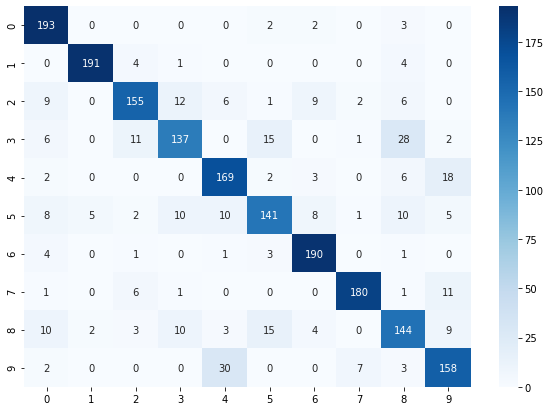

In [18]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [19]:
num_cluster_per_num = 4
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 6.440831661224365
Processing time is : 0.5359306335449219


In [21]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [22]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [23]:
accuracy_score(new_outputs[0],test_labels[0])

0.87

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=40)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Pca_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 51.87757897377014
Processing time is : 0.002629518508911133


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(out_puts,test_labels[0])

0.939

<AxesSubplot:>

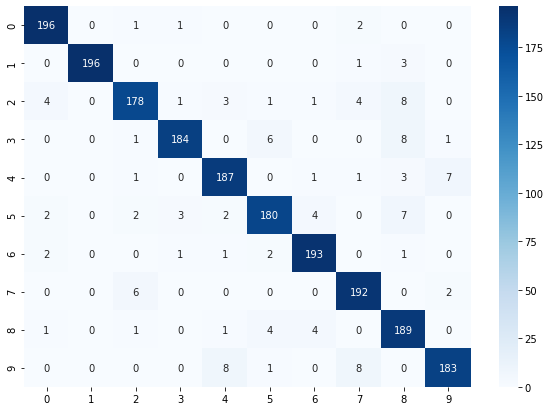

In [26]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [27]:
num_cluster_per_num = 16
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 12.717469215393066
Processing time is : 1.4338750839233398


In [28]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [29]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [30]:
accuracy_score(new_outputs[0],test_labels[0])

0.937

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=160)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Pca_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 74.17006015777588
Processing time is : 0.004492521286010742
/home/ibrahim/anaconda3/envs/dl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(out_puts,test_labels[0])

0.9485

<AxesSubplot:>

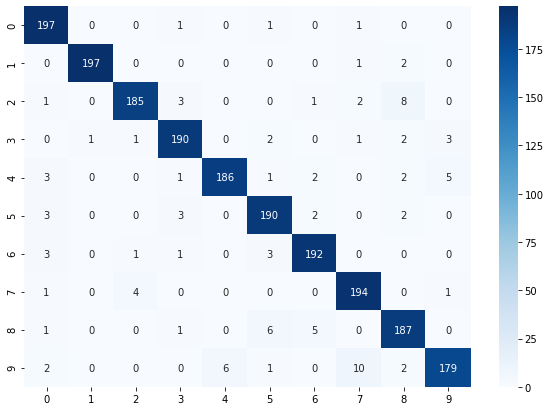

In [33]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [34]:
from sklearn.mixture import GaussianMixture as GMM 
import time
num_cluster_per_num = 1
gmm = GMM(n_components=num_cluster_per_num*10) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 16.863582372665405
Processing time is : 0.03523659706115723


In [35]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [36]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [37]:
accuracy_score(new_outputs[0],test_labels[0])

0.662

In [ ]:
num_cluster_per_num = 4
gmm = GMM(n_components=num_cluster_per_num*10) # random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 18.136841535568237
Processing time is : 0.5667040348052979


In [ ]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [ ]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [ ]:
accuracy_score(new_outputs[0],test_labels[0])

0.9005

In [40]:
num_cluster_per_num = 16
gmm = GMM(n_components=num_cluster_per_num*10) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Pca_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 23.67695140838623
Processing time is : 0.5143551826477051


In [41]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [45]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(np.random.choice(range(0,10),1)[0])
new_outputs = np.array(new_outputs).reshape(1,2000)

In [46]:
accuracy_score(new_outputs[0],test_labels[0])

0.9675

<AxesSubplot:>

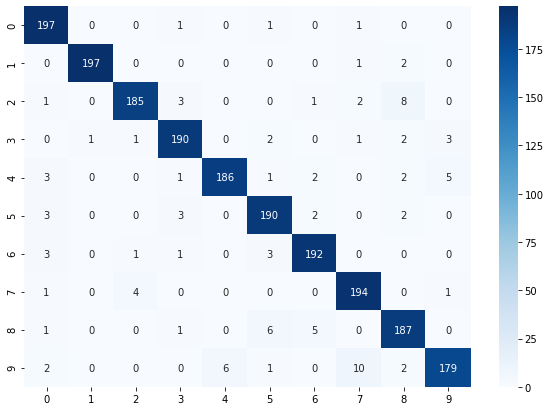

In [52]:
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [48]:
from sklearn.svm import SVC
from sklearn.utils import shuffle
clf = SVC(C=.1,kernel = 'linear')
x , y = shuffle(Pca_train_data,train_labels.reshape(10000,))
time_before_fitting = time.time()
clf.fit(x, y.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 3.1431570053100586
Processing time is : 1.0074481964111328


In [ ]:
accuracy_score(Y_pred,test_labels[0])

0.9335

In [ ]:
clf = SVC(kernel = 'poly',degree=3)

time_before_fitting = time.time()
clf.fit(Pca_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 20.911666870117188
Processing time is : 4.120998859405518


In [ ]:
accuracy_score(Y_pred,test_labels[0])

0.975

In [49]:
clf = SVC(kernel = 'rbf',degree=3)

time_before_fitting = time.time()
clf.fit(Pca_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(Pca_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 5.333672285079956
Processing time is : 1.5941400527954102


In [50]:
accuracy_score(Y_pred,test_labels[0])

0.9765

<AxesSubplot:>

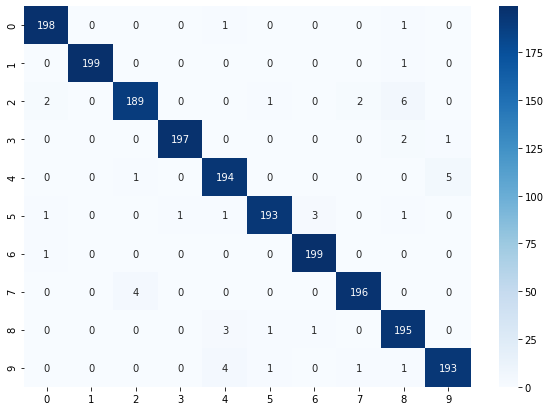

In [51]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],Y_pred))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')